In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = "spamham.csv" #( or u can use "updated_data.csv" to predic on another dataset.)
data = pd.read_csv(file_path)

# Inspect the first few rows of the dataset
print(data.head())

  label                                              email
0  spam  into the kingdom of god and those that are ent...
1   ham  there was flow at hpl meter 1505 on april firs...
2  spam  take a look at this one campaign for bvyhprice...
3   ham  somu wrote actually thats what i was looking f...
4   ham  fathi boudra wrote i fixed the issue in the sv...


In [3]:
# Preprocess the data
def preprocess_email(email):
    # Remove email addresses, URLs, non-alphanumeric characters, and extra spaces
    email = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '', email)  # Remove email addresses
    email = re.sub(r'http\S+|www\S+|https\S+', '', email, flags=re.MULTILINE)  # Remove URLs
    email = re.sub(r'[^a-zA-Z0-9\s]', '', email)  # Remove non-alphanumeric characters
    email = email.lower()  # Convert to lowercase
    email = re.sub(r'\s+', ' ', email).strip()  # Remove extra whitespace
    return email

# Apply preprocessing
data['cleaned_email'] = data['email'].apply(preprocess_email)
# Convert labels to binary (assuming 'spam' and 'ham')
data['label'] = data['label'].map({'spam': 1, 'ham': 0})  # 1 for spam, 0 for ham


In [4]:
# Split the dataset
X = data['cleaned_email']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [5]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.8, max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)
nb_accuracy = accuracy_score(y_test, nb_pred)

# Train Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train_vec, y_train)
log_reg_pred = log_reg.predict(X_test_vec)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

# Train Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
random_forest.fit(X_train_vec, y_train)
rf_pred = random_forest.predict(X_test_vec)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [7]:
# Display Accuracy
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

# Classification reports
print("Naive Bayes Classification Report")
print(classification_report(y_test, nb_pred))

print("Logistic Regression Classification Report")
print(classification_report(y_test, log_reg_pred))

print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))


Naive Bayes Accuracy: 0.9616282949616283
Logistic Regression Accuracy: 0.9683016349683017
Random Forest Accuracy: 0.9673006339673006
Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1409
           1       0.96      0.97      0.96      1588

    accuracy                           0.96      2997
   macro avg       0.96      0.96      0.96      2997
weighted avg       0.96      0.96      0.96      2997

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1409
           1       0.96      0.98      0.97      1588

    accuracy                           0.97      2997
   macro avg       0.97      0.97      0.97      2997
weighted avg       0.97      0.97      0.97      2997

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96   

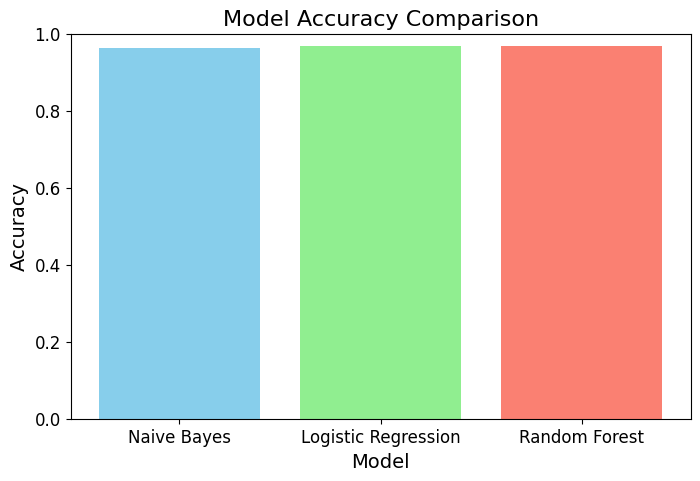

In [8]:
# Visualizations
# Bar plot for accuracy
model_names = ["Naive Bayes", "Logistic Regression", "Random Forest"]
accuracies = [nb_accuracy, log_reg_accuracy, rf_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

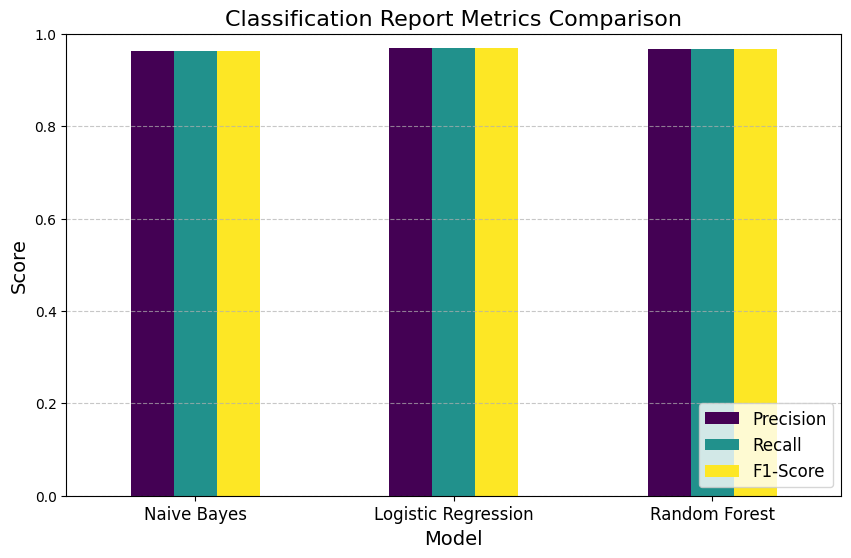

In [9]:
# Metrics comparison using classification report scores
metrics = {
    "Naive Bayes": precision_recall_fscore_support(y_test, nb_pred, average='weighted'),
    "Logistic Regression": precision_recall_fscore_support(y_test, log_reg_pred, average='weighted'),
    "Random Forest": precision_recall_fscore_support(y_test, rf_pred, average='weighted'),
}

metrics_df = pd.DataFrame(metrics, index=["Precision", "Recall", "F1-Score", "Support"]).transpose()

# Plot metrics
metrics_df[["Precision", "Recall", "F1-Score"]].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.ylim(0, 1)
plt.title("Classification Report Metrics Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.legend(fontsize=12, loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [11]:
# Function to predict whether an email is spam or ham
def predict_email(email_text, vectorizer, nb_model, log_reg, random_forest):
    # Preprocess the email
    processed_email = preprocess_email(email_text)
    
    # Convert the email text into numerical features using the trained vectorizer
    email_vec = vectorizer.transform([processed_email])
    
    # Predict using each model
    nb_prediction = nb_model.predict(email_vec)[0]
    log_reg_prediction = log_reg.predict(email_vec)[0]
    rf_prediction = random_forest.predict(email_vec)[0]
    
    # Print predictions
    print("Predictions for the email:")
    print(f"Naive Bayes: {'Spam' if nb_prediction == 1 else 'Ham'}")
    print(f"Logistic Regression: {'Spam' if log_reg_prediction == 1 else 'Ham'}")
    print(f"Random Forest: {'Spam' if rf_prediction == 1 else 'Ham'}")

# Example new email
new_email = "Dear brother see you at home."

# Call the function with the new email
predict_email(new_email, vectorizer, nb_model, log_reg, random_forest)


Predictions for the email:
Naive Bayes: Spam
Logistic Regression: Spam
Random Forest: Spam
